In [ ]:
import numpy as np
from cellpose import models, io
import logging
import time
#import matplotlib.pyplot as plt
impath = r"D:\images\tnia-python-images\imagesc\2024_09_01_cellpose_repeat\seashells.png"
logging.basicConfig(level=logging.INFO)
im = io.imread(impath)


mod = models.Cellpose(gpu=True, model_type="cyto3")
#masks_cpu = mod.eval(im, diameter=70, channels=[0,0])[0]
masks_cpu = mod.eval(im, channels=[0,0])[0]
print(f"Number of masks: {len(np.unique(masks_cpu)-1)}")
print("")
time.sleep(1)

mod = models.Cellpose(gpu=False, model_type="cyto3")
#masks_gpu = mod.eval(im, diameter=70, channels=[0,0])[0]
masks_gpu = mod.eval(im, channels=[0,0])[0]
print(f"Number of masks: {len(np.unique(masks_gpu)-1)}")


In [ ]:
from tnia.plotting.plt_helper import imshow_multi2d

fig = imshow_multi2d([im, masks_cpu], ["Image", "Masks"], 1,2,colormaps=["gray", "viridis"])

INFO:cellpose.core:** TORCH CUDA version installed and working. **
INFO:cellpose.core:>>>> using GPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\bnort\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [2, 1]
INFO:cellpose.models:~~~ FINDING MASKS ~~~
c:\Users\bnort\miniconda3\envs\pytorch_and_SAM3\lib\site-packages\cellpose\transforms.py:575: UserWarning: 'chan2 (opt)' has value range of ZERO, can instead set chan2 to 0
  warnings.warn(
INFO:cellpose.models:>>>> TOTAL TIME 0.44 sec
INFO:cellpose.core:>>>> using CPU
INFO:cellpose.models:>> cyto3 << model set to be used
INFO:cellpose.models:>>>> loading model C:\Users\bnort\.cellpose\models\cyto3
INFO:cellpose.models:>>>> model diam_mean =  30.000 (ROIs rescaled to this size during training)
INFO:cellpose.models:channels set to [2, 1]
INFO:cellpose.models:~~~ FINDING MASKS ~

168


INFO:cellpose.models:>>>> TOTAL TIME 2.30 sec


180


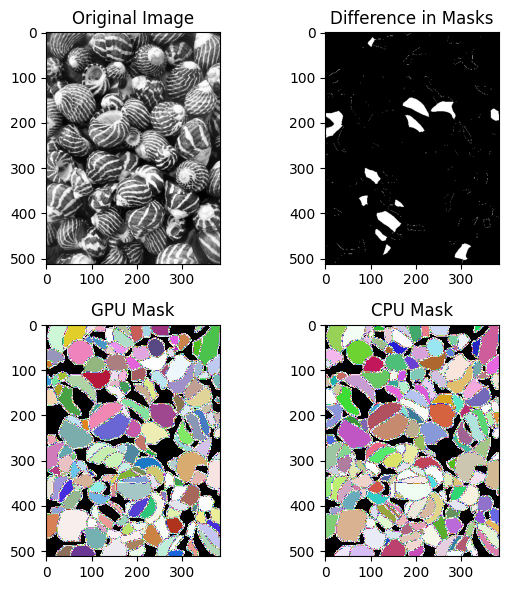

In [ ]:
import random
import numpy as np
from cellpose import models, io, metrics
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import logging
from tnia.plotting.plt_helper import random_label_cmap

im_path = r"D:\images\tnia-python-images\imagesc\2024_09_01_cellpose_repeat\seashells.png"
logging.basicConfig(level=logging.INFO)
diam = None
mod = models.Cellpose(gpu=True, model_type="cyto3")
if im_path.endswith(".png"):
    im = io.imread(im_path)
    gpu_mask = mod.eval(im, channels=[2, 1])[0]
    print(len(np.unique(gpu_mask) - 1))

diam = None
mod = models.Cellpose(gpu=False, model_type="cyto3")
if im_path.endswith(".png"):
    im = io.imread(im_path)
    cpu_mask = mod.eval(im, channels=[2, 1])[0]
    print(len(np.unique(cpu_mask) - 1))

fig, axs = plt.subplots(2, 2, figsize=(6, 6))
axs[0, 0].imshow(rgb2gray(im), cmap="gray")
axs[0, 0].set_title("Original Image")
axs[1, 0].imshow(gpu_mask, cmap=random_label_cmap())
axs[1, 0].set_title("GPU Mask")
axs[1, 1].imshow(cpu_mask, cmap=random_label_cmap())
axs[1, 1].set_title("CPU Mask")

m1 = gpu_mask > 0 # Converts label image to binary mask
m2 = cpu_mask > 0

axs[0, 1].imshow(m1 != m2, cmap="gray")
axs[0, 1].set_title("Difference in Masks")

plt.tight_layout()


In [11]:
import napari
viewer = napari.Viewer()
viewer.add_image(rgb2gray(im))
viewer.add_labels(cpu_mask, name="masks_cpu")
viewer.add_labels(gpu_mask, name="masks_gpu")
napari.run()